# ARMA Models - Lab

## Introduction

In this lab, you'll practice your knowledge the Autoregressive (AR), the Moving Average (MA) model, and the combined ARMA model.

## Objectives

You will be able to:
- Understand and explain what a Autoregressive model is
- Understand and explain what a Moving Average model is
- Understand and apply the mathematical formulations for Autoregressive and Moving Average models
- Understand how AR and MA can be combined in ARMA models

## Generate an AR model of the first order with $\phi = 0.7$

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Recall that the AR model has the following formula:

$$Y_t = \mu + \phi * Y_{t-1}+\epsilon_t$$

This means that:

$$Y_1 = \mu + \phi * Y_{0}+\epsilon_1$$
$$Y_2 = \mu + \phi * (\text{mean-centered version of } Y_1) +\epsilon_2$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 2. Make sure you have a daily datetime index ranging from January 2017 until the end of March 2018. Assume that $\mu=5$ and $Y_0= 8$.


In [51]:
# keep the random seed
np.random.seed(11225)

In [4]:
# create a series with the specified dates
dates = pd.date_range('01/01/2017','03/31/2018')
len(dates)

455

In [52]:
# store the parameters
sd = 2
mu = 5
y_0 = 8
phi = 0.7
size = len(dates)

In [53]:
# caculate error (noise)
error = np.random.normal(loc=0, scale=sd, size=size)        #normal(loc=0.0 (mean), scale=1.0(sd), size=None)

In [54]:
# generate the time series according to the formula
series = [None] * size
y_x = y_0

for i, row in enumerate(dates):
    series[i] = mu + phi * y_0 + error[i]
    y_x = series[i] - mu 

Plot the time series and verify what you see

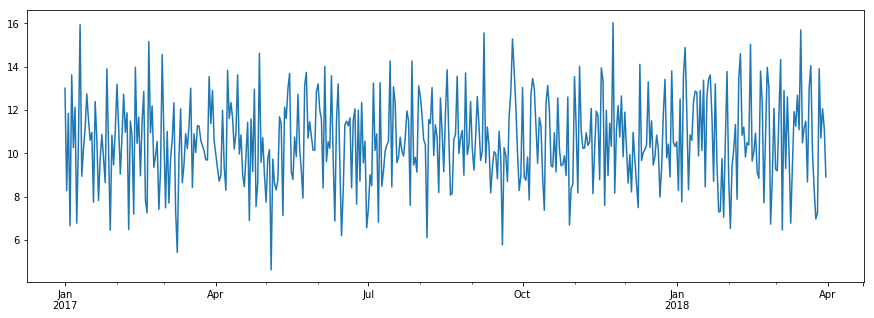

In [55]:
series = pd.Series(series, index=dates)        #make the Series
series.plot(figsize=(15,5))

## Look at the ACF and PACF of your model and write down your conclusions

We recommend to use `plot_acf` in statsmodels instead of the pandas ACF variant.

In [56]:
series.head()

2017-01-01    13.008794
2017-01-02     8.284712
2017-01-03    11.841325
2017-01-04     6.657017
2017-01-05    13.627333
Freq: D, dtype: float64

In [22]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pylab import rcParams

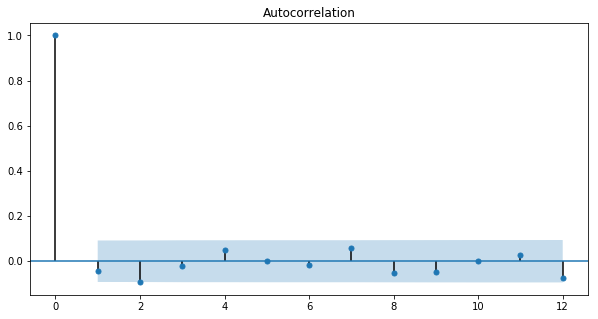

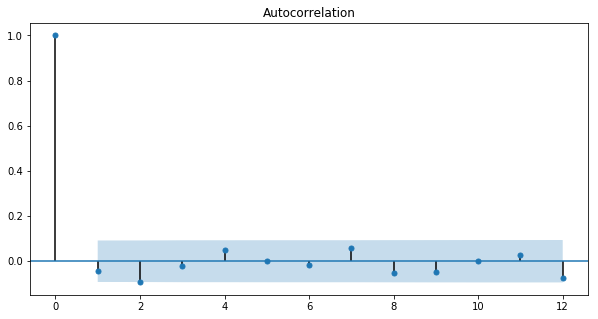

In [57]:
rcParams['figure.figsize'] = 10,5
plot_acf(series, lags=12)

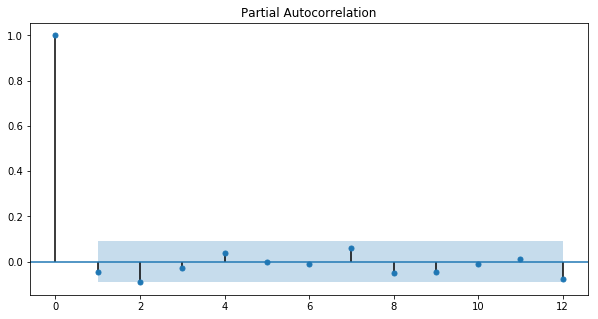

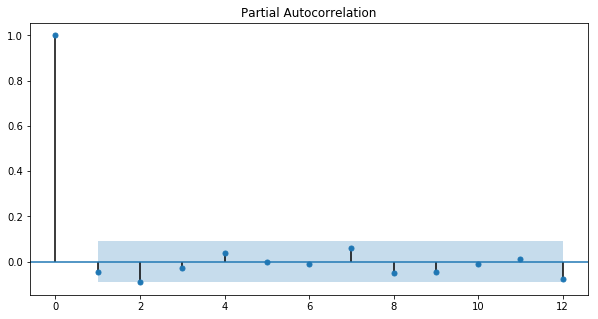

In [58]:
rcParams['figure.figsize'] = 10,5
plot_pacf(series, lags=12)

## Check your model with ARMA in statsmodels

Statsmodels also has a tool that fits ARMA models on time series. The only thing you have to do is provide the number of orders for AR vs MA. Have a look at the code below, and the output of the code. Make sure that the output for the $\phi$ parameter and $\mu$ is as you'd expect!

In [59]:
# assuming your time series are stored in an object "series"
# Import the ARMA module from statsmodels
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Fit an MA(1) model to the first simulated data
mod_arma = ARMA(series, order=(1,0))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print('Summary', res_arma.summary())

# Print out the estimate for the constant and for theta
print('Parameters', res_arma.params)

Summary                               ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(1, 0)   Log Likelihood                -965.646
Method:                       css-mle   S.D. of innovations              2.021
Date:                Sun, 03 Feb 2019   AIC                           1937.292
Time:                        15:20:28   BIC                           1949.653
Sample:                    01-01-2017   HQIC                          1942.162
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5675      0.091    116.501      0.000      10.390      10.745
ar.L1.y       -0.0444      0.047     -0.946      0.344      -0.136       0.048
                                    Roots   

/Users/natalia/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/natalia/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/natalia/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)

## Generate an MA model of the first order with $\theta = 0.9$

Recall that the MA model has the following formula:

$$Y_t = \mu +\epsilon_t + \theta * \epsilon_{t-1}$$

This means that:

$$Y_1 = \mu + \epsilon_1+  \theta * \epsilon_{0}$$
$$Y_2 = \mu + \epsilon_2+  \theta * \epsilon_{1}$$

and so on. 

Assume a mean-zero white noise with a standard deviation of 4. Make sure you have a daily datetime index is ranging from April 2015 until the end of August 2015. Assume that $\mu=7$.

In [60]:
# keep the random seed
np.random.seed(1234)

# create a series with the specified dates
dates_2 = pd.date_range('04/01/2015','08/31/2015')
len(dates_2)

153

In [61]:
# store the parameters
sd = 4
mu = 7
theta = 0.9
size = len(dates_2)

In [62]:
# caculate error (noise)
error_2 = np.random.normal(loc=0, scale=sd, size=size)        #normal(loc=0.0 (mean), scale=1.0(sd), size=None)

In [63]:
#generate the time series
serie_2 = [None] * size
prev_error = error_2[0]

for i, row in enumerate(dates_2):
    serie_2[i] = mu + theta * prev_error + error_2[i]
    prev_error = error_2[i]

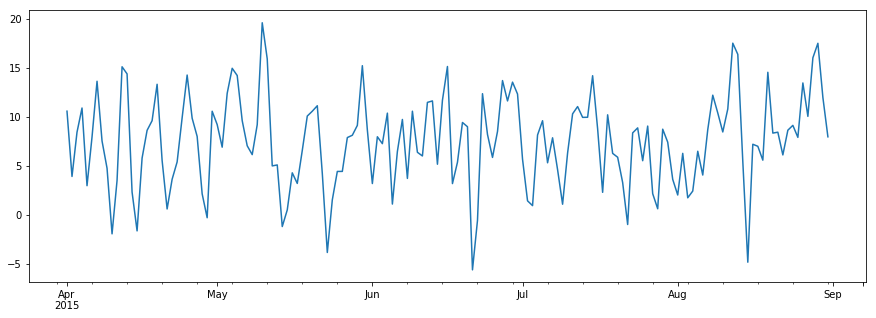

In [64]:
# Plot the time series
serie_2 = pd.Series(serie_2, index=dates_2)        #make the Series
serie_2.plot(figsize=(15,5))

## Look at the ACF and PACF of your model and write down your conclusions

In [65]:
serie_2.head()

2015-04-01    10.582907
2015-04-02     3.933264
2015-04-03     8.443315
2015-04-04    10.907138
2015-04-05     2.992098
Freq: D, dtype: float64

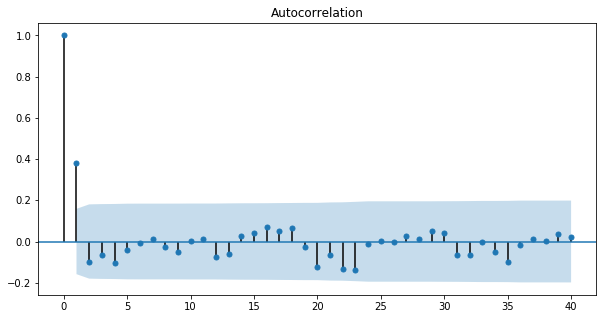

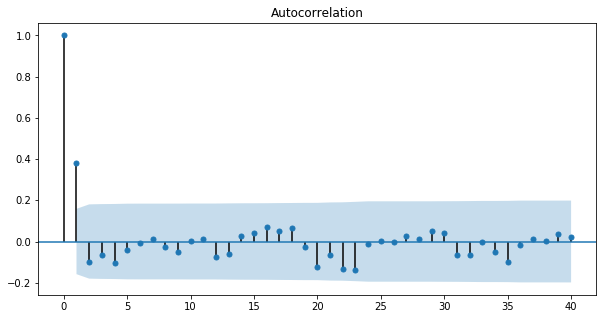

In [66]:
rcParams['figure.figsize'] = 10,5
plot_acf(serie_2, lags=40)

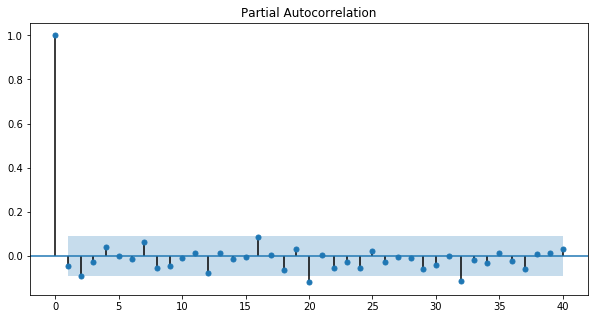

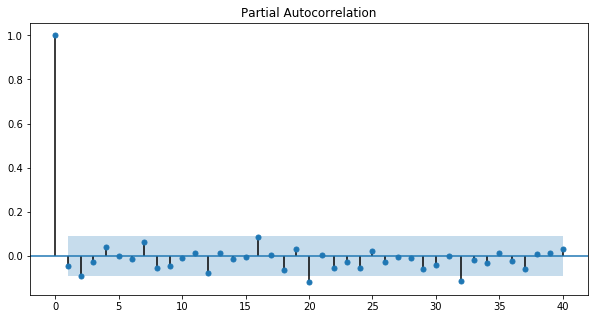

In [67]:
rcParams['figure.figsize'] = 10,5
plot_pacf(series, lags=40)

## Check your model with ARMA in statsmodels

Repeat what you did for your AR model but now for your MA model to verify the parameters are estimated correctly.

In [68]:
# Fit an AR(1) model to the first simulated data
mod_arma = ARMA(series, order=(0,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print('Summary:')
print(res_arma.summary())
print('Parameters:')
print(res_arma.params)

Summary:
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  455
Model:                     ARMA(0, 1)   Log Likelihood                -965.545
Method:                       css-mle   S.D. of innovations              2.020
Date:                Sun, 03 Feb 2019   AIC                           1937.090
Time:                        15:20:54   BIC                           1949.451
Sample:                    01-01-2017   HQIC                          1941.960
                         - 03-31-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.5675      0.090    117.994      0.000      10.392      10.743
ma.L1.y       -0.0544      0.052     -1.049      0.295      -0.156       0.047
                                    Roots  

## Create a model for the 400m data set

Import the data set containing the historical running times for the men's 400m on the Olympic games.

In [73]:
# the data is in "winning_400m.csv"
data_400 = pd.read_csv('winning_400m.csv')
data_400.head()

,year,winning_times
0,1900,49.4
1,1904,49.2
2,1908,50.0
3,1912,48.2
4,1920,49.6


In [74]:
data.year = data.year.astype(str)
data.year = pd.to_datetime(data.year.astype(str))
data_400.set_index('year', inplace=True)
data_400.head()

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6


Plot the data

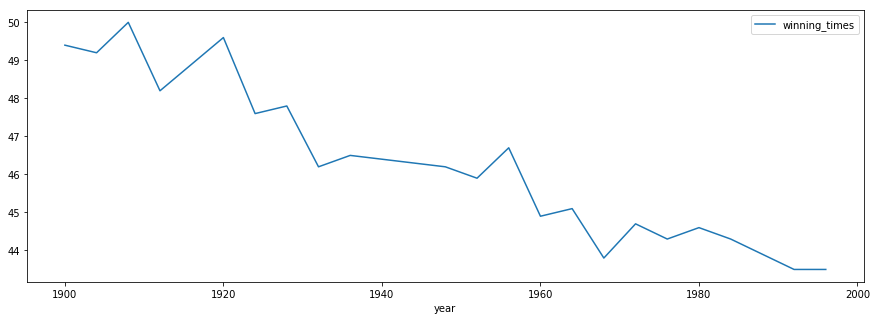

In [75]:
data_400.plot(figsize=(15,5));

Difference the data to get a stationary time series. Make sure to remove the first NaN value.

In [76]:
data_400_diff = data_400.diff().dropna()
data_400_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


/Users/natalia/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


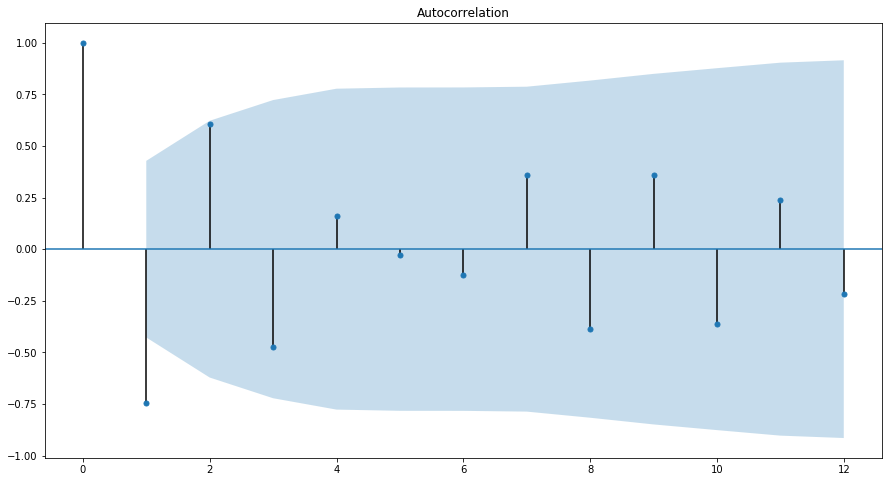

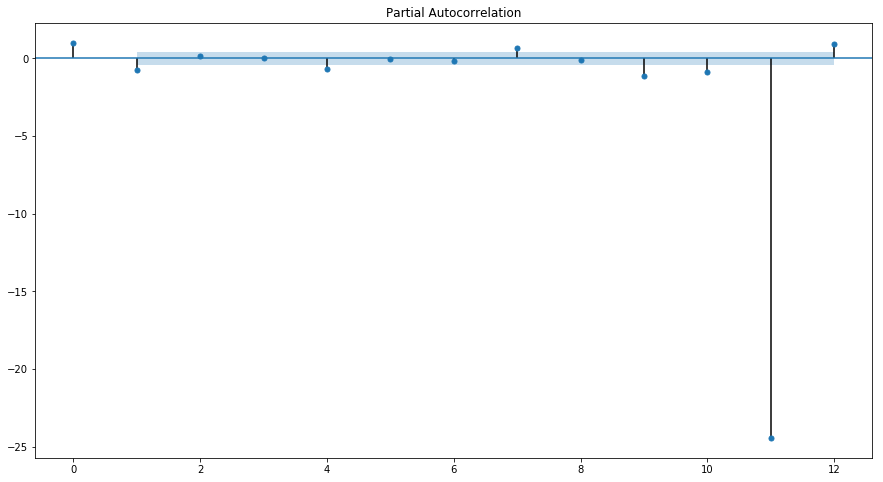

In [77]:
# Look at ACF and PACF

rcParams['figure.figsize'] = 15,8
plot_acf(data_400_diff, lags=12);
plot_pacf(data_400_diff, lags=12);

Based on the ACF and PACF, fit an arma model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates.

In [78]:
mod_arma = ARMA(data_400_diff, order=(2,1))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print('Summary:')
print(res_arma.summary())
print('Parameters:')
print(res_arma.params)

/Users/natalia/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Summary:
                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 1)   Log Likelihood                 -18.955
Method:                       css-mle   S.D. of innovations              0.562
Date:                Mon, 04 Feb 2019   AIC                             47.911
Time:                        08:37:14   BIC                             53.133
Sample:                             0   HQIC                            49.044
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2916      0.073     -4.018      0.001      -0.434      -0.149
ar.L1.winning_times    -1.6827      0.119    -14.199      0.000      -1.915      -1.450
ar.L2.w

In [79]:
# Try another one
mod_arma = ARMA(data_400_diff, order=(2,2))
res_arma = mod_arma.fit()

# Print out summary information on the fit
print('Summary:')
print(res_arma.summary())
print('Parameters:')
print(res_arma.params)

/Users/natalia/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Summary:
                              ARMA Model Results                              
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 2)   Log Likelihood                 -16.472
Method:                       css-mle   S.D. of innovations              0.461
Date:                Mon, 04 Feb 2019   AIC                             44.943
Time:                        08:37:44   BIC                             51.210
Sample:                             0   HQIC                            46.303
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2718      0.098     -2.779      0.013      -0.463      -0.080
ar.L1.winning_times    -1.7575      0.097    -18.070      0.000      -1.948      -1.567
ar.L2.w

## What is your final model? Why did you pick this model?

## Summary

Great! Now that you know the ins and outs of ARMA models and you've practiced your modeling knowledge.